## **House Prices Prediction Advanced Regression Techniques**


There are disparities in house prices and various features influence this. Using Python, I pulled data from Kaggle, performed data cleaning and EDA and built a machine learning model to predict prices. After identifying the best performing model, I made some recommendations

**Objective:** The main goal of this project is to develop a machine learning model that accurately predicts house prices based on various features. Using the ''House Prices-Advanced Regression Techniques'' dataset from kaggle, we will apply data science and machine learning skills to build a robust model. This analysis and model will be crucial to stakeholders in the house market in making informed decisions.


**Tools and Libraries:** Utilized Python, Kaggle's dataset, Pandas, Numpy, Matplotlip, Seaborn to analyze and model the data.

# **Business Problem**

**Problem Identification:** House prices prediction is crucial for real estate investors, buyers and selers but current methods often fall short. Inaccurate predictions can lead to fiancial losses, missed opportunities and decreased customer satisfaction. it requires analyzing multiple factors especially since owning real estate is not only a national concern but also an individual one. With increasing demand for housing, prices also are on the high and its important to predict and know what features affect these prices.

**Critical Assumptions:** People looking to buy houses are mostly two people households potentially looking to raise a family so they would need alot of square footage space for children to run around, porch area for when family is around or for hosting birthday/holiday parties, they will need to have have their own rooms and bathroom, maybe a two or more car garage for prarents, how old the house is and when last it was remodelled to meet modern standards etc which I assume would affect the house prices.

# **Methodology:**



**Data Cleaning & Transformation:**
1. Dropping Columns with Excessive Missing Values: I simplified my data by dropping ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Street', 'Condition2']. They had high proportion of missing values and were not critical for predictive accuracy

2. Filling Missing Values for Categorical Features: Fireplace-related Columns were filled with 'No Fireplace'. Because it indicates the absence of a fireplace according to the information on the data from kaggle.

Garage-related Columns: Missing values in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] were filled with 'No Garage'.
Because the data information tells us the absence of a garage.

Masonry Veneer Type: Missing values in the MasVnrType column were filled with 'None'. Because the data information indicates the absence of masonry veneer.

3. Imputing Categorical Features with Mode: For categorical columns such as ['Electrical', 'MSZoning', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType'], missing values were filled using the most frequent value (mode). Because using the mode preserves the most common category in the dataset and helps maintain the distribution of categorical data.

4. Filling Missing Values for Basement-related Features: Missing values in (['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']) were filled with 'No Basement'. Because it indicates the absence of a basement.

5. Imputing Numerical Features with Median: For numerical columns such as ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'], missing values were filled with the median value. Because the median is robust to outliers and provides a central value for missing data in numerical features,  ensuring that the imputed values do not skew the distribution.


**Exploratory Data Analysis (EDA):** Conducted EDA to understand feature distributions and relationships and subsequently dropped features i believed to be irrelevant to this project. Visualization was done using scatter plots for numerical features and box plots for categorical features.

**Feature Engineering:** Created new features for Total Square Feet, Age of the house, How long ago was the house remodelled, Total Living Area, Total Bathrooms and Total Porch Square Feet based on intuition - business perspective, encoded categorical variables and normalized/standardized numerical features.

**Model Training and Evaluation:** Trained multiple models(Linear Regression, Decision Tree, Random Forest, Gradient Boosting), evaluated performance using RMSE, MAE, R2 and performed hyperparameter tuning and chose the best performing model.

Importing relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

Task 1.2: Downloaded the [data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) and Loaded the dataset into a Pandas DataFrame

In [ ]:
# Importing the dataset
train_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')


In [ ]:
pd.options.display.max_columns = None #Increase default number of columns
train_df.head() #Display the first 5 rows in train data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
pd.options.display.max_columns #Increase default number of columns
test_df.head() #Display the first 5 rows in test data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.columns #Displaying the columns in the train data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test_df.columns #Displaying the columns in the test data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print(train_df.shape) #Displaying how many rows and columns in the datasets
print("******")
print(test_df.shape)

(1460, 81)
******
(1459, 80)


Task 1.3: Inspected the dataset for missing values and handled them using imputation techniques appropriately

In [ ]:
# Checking for missing values in the training set
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])


              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


Task 1.4: Performed data cleaning to ensure the dataset was ready for analysis

In [ ]:
# Drop columns with redundant and excessive missing values
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities',
                   'Street', 'Condition2']
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values for categorical fireplace-related columns with 'No Fireplace'
categorical_cols_fill_unknown = ['FireplaceQu']
for col in categorical_cols_fill_unknown:
    train_df[col].fillna('No Fireplace', inplace=True)
    test_df[col].fillna('No Fireplace', inplace=True)

# Fill missing values for categorical Garage-related columns with 'No Garage'
categorical_cols_fill_no_garage = ['GarageType', 'GarageFinish', 'GarageQual',
                                   'GarageCond']
for col in categorical_cols_fill_no_garage:
    train_df[col].fillna('No Garage', inplace=True)
    test_df[col].fillna('No Garage', inplace=True)

# Fill missing values for specific columns with 'None'
train_df['MasVnrType'].fillna('None', inplace=True)
test_df['MasVnrType'].fillna('None', inplace=True)

# Fill missing values for categorical column with mode
categorical_cols_fill_mode = ['Electrical', 'MSZoning', 'Exterior1st',
                              'Exterior2nd', 'KitchenQual', 'Functional',
                              'SaleType']
mode_imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform on the training set, then transform the test set
train_df[categorical_cols_fill_mode] = mode_imputer.fit_transform(train_df[categorical_cols_fill_mode])
test_df[categorical_cols_fill_mode] = mode_imputer.transform(test_df[categorical_cols_fill_mode]) # Use transform on test set

# Fill missing values for basement-related columns with 'No Basement'
basement_features = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
                     'BsmtFinType1']
for feature in basement_features:
    train_df[feature].fillna('No Basement', inplace=True)
    test_df[feature].fillna('No Basement', inplace=True)

# Fill missing values for numerical columns with the median
median_imputer = SimpleImputer(strategy='median')
fill_numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt','BsmtFinSF1',
                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                     'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

# Fit and transform on the training set, then transform the test set
train_df[fill_numerical_columns] = median_imputer.fit_transform(train_df[fill_numerical_columns])
test_df[fill_numerical_columns] = median_imputer.transform(test_df[fill_numerical_columns]) # Use transform on test set

# Verify no missing values
remaining_missing_train = train_df.isnull().sum()
print("Remaining missing values in training set:\n", remaining_missing_train[remaining_missing_train > 0])

remaining_missing_test = test_df.isnull().sum()
print("Remaining missing values in test set:\n", remaining_missing_test[remaining_missing_test > 0])

# Check for remaining missing values
assert train_df.isnull().sum().sum() == 0, "There are still missing values in the training set"
assert test_df.isnull().sum().sum() == 0, "There are still missing values in the test set"

Remaining missing values in training set:
 Series([], dtype: int64)
Remaining missing values in test set:
 Series([], dtype: int64)


In [ ]:
train_df.info() #confirming no more missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [ ]:
print(train_df.shape) #the shape is different because of the columns dropped
print("******")
print(test_df.shape)

(1460, 74)
******
(1459, 73)


# **Phase 2: Exploratory Data Analysis (EDA)**

Task 2.1: Conducted EDA to understand the distribution of features and the relationship with the target variable(house prices)

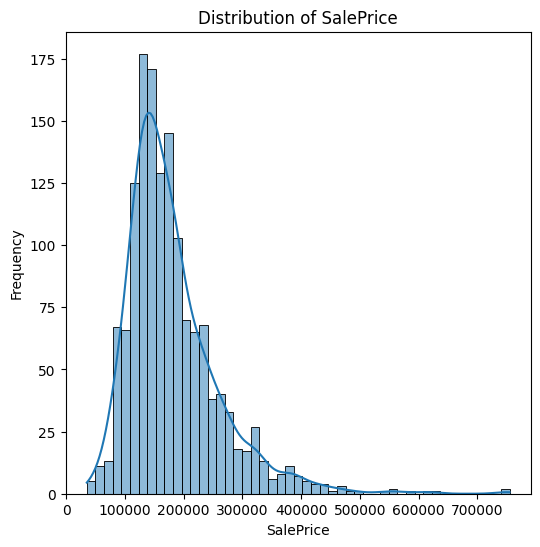

In [ ]:
# Distribution of Sale Price
plt.figure(figsize=(6, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Positive/Right Skeweness:
train_df['SalePrice'].skew()

1.8828757597682129

I realized there was a right skewness and log transformed sale price to sort the skweness and fit a more normal distribution because in this year and age it is impossible to find such cheap houses

In [ ]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"]) # Log Transformation

Text(0.5, 1.0, 'Density plot of SalePrice after Log Transformation')

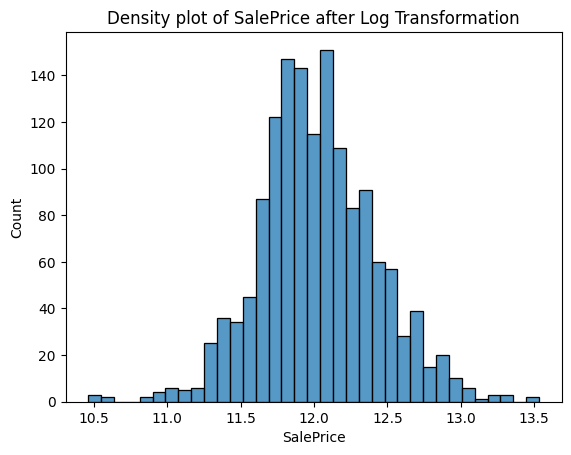

In [ ]:
# SalePrice after Log-transformation
sns.histplot(train_df, x=train_df['SalePrice'])
plt.title("Density plot of SalePrice after Log Transformation")

Task 2.2: Visualized the relationships between features and the target variable

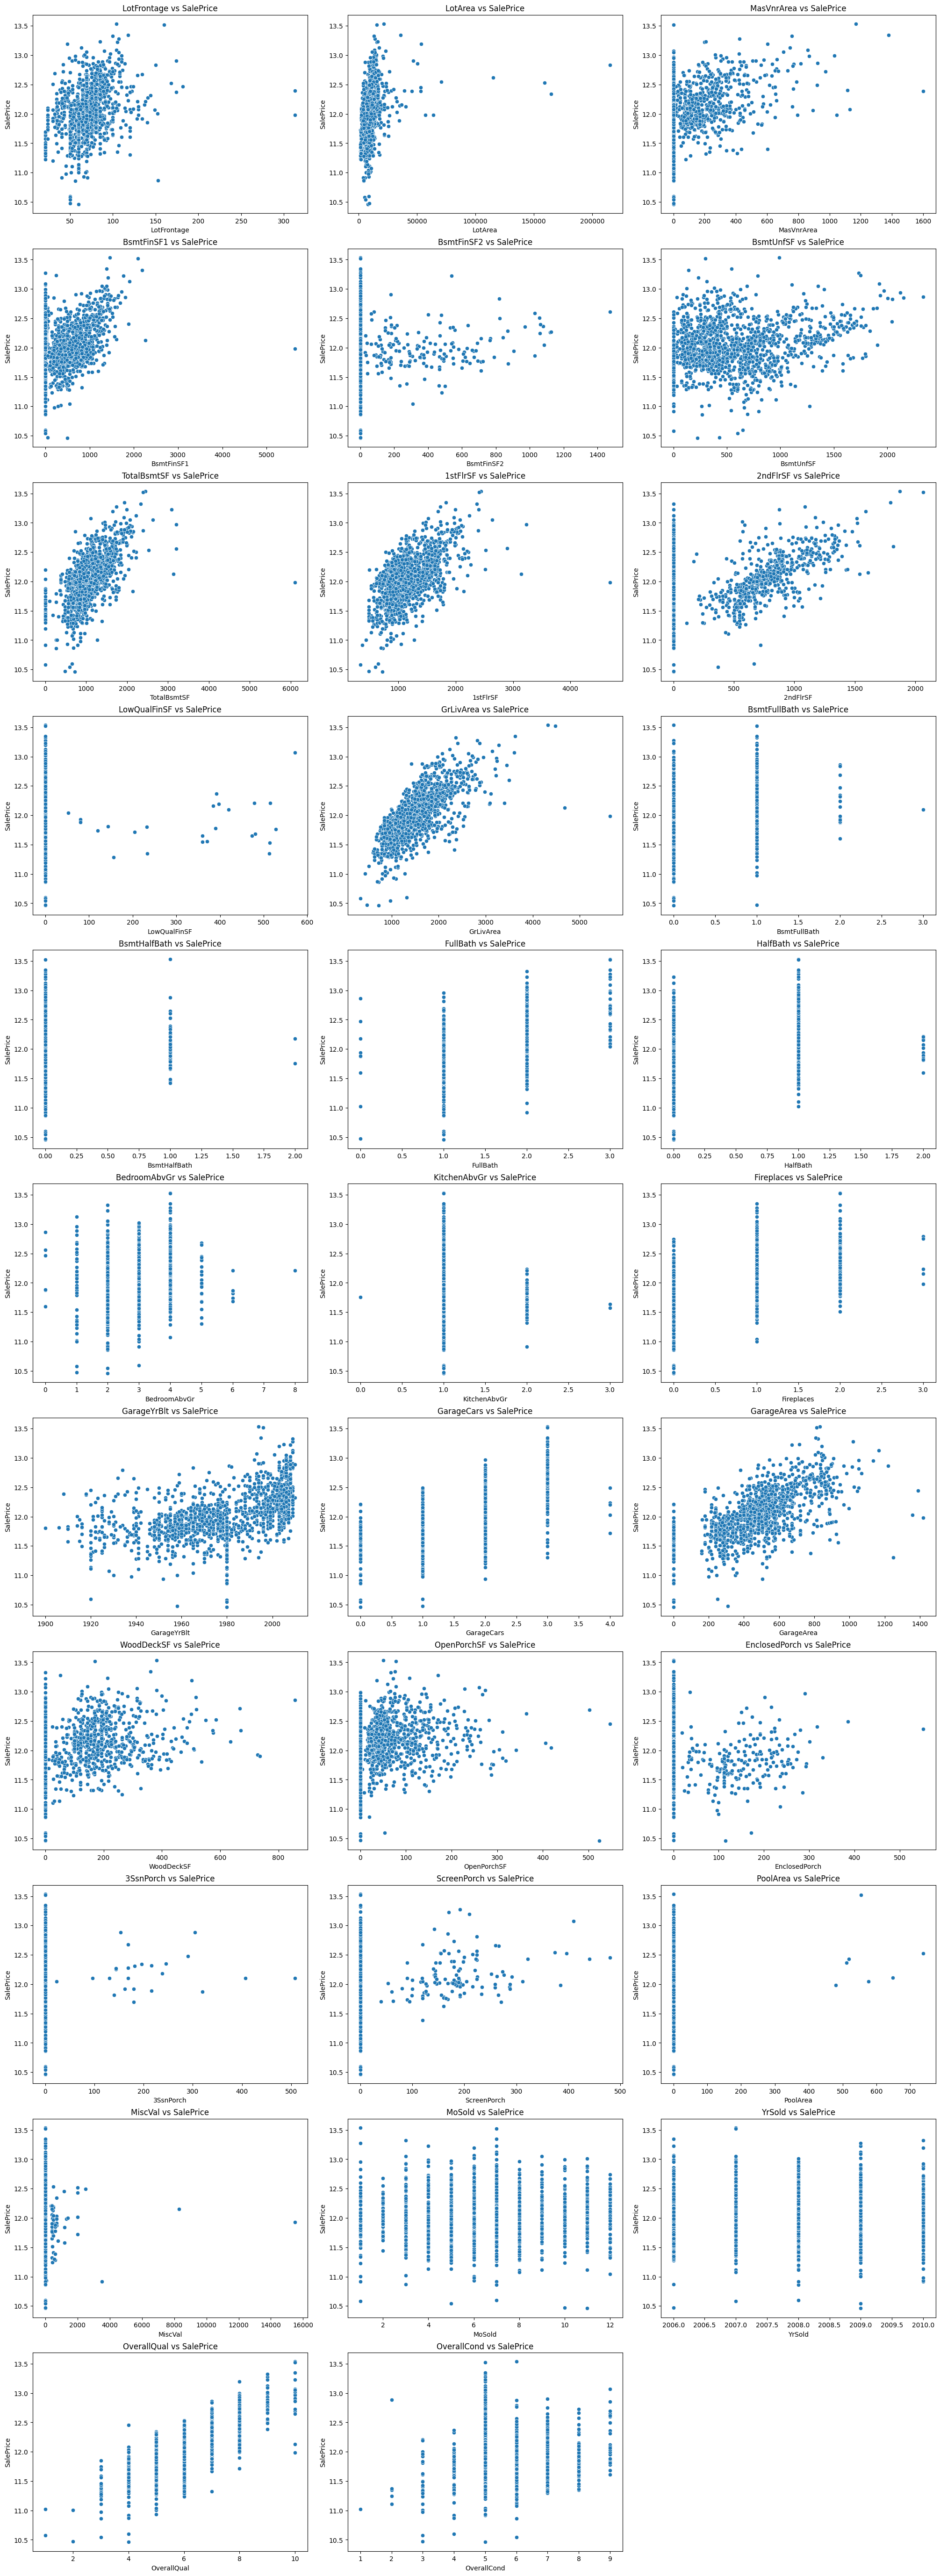

In [ ]:
# Numerical Features: Scatter plots are used to show the relationship between each numerical feature and SalePrice
#It also visually shows the outliers

# Numerical features to plot
numerical_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual',
                      'OverallCond']

#numerical_features = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Scatter plots
num_plots = len(numerical_features)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5),
                         constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, feature in enumerate(numerical_features):
    sns.scatterplot(ax=axes[i], x=train_df[feature], y=train_df['SalePrice'])
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

plt.show()

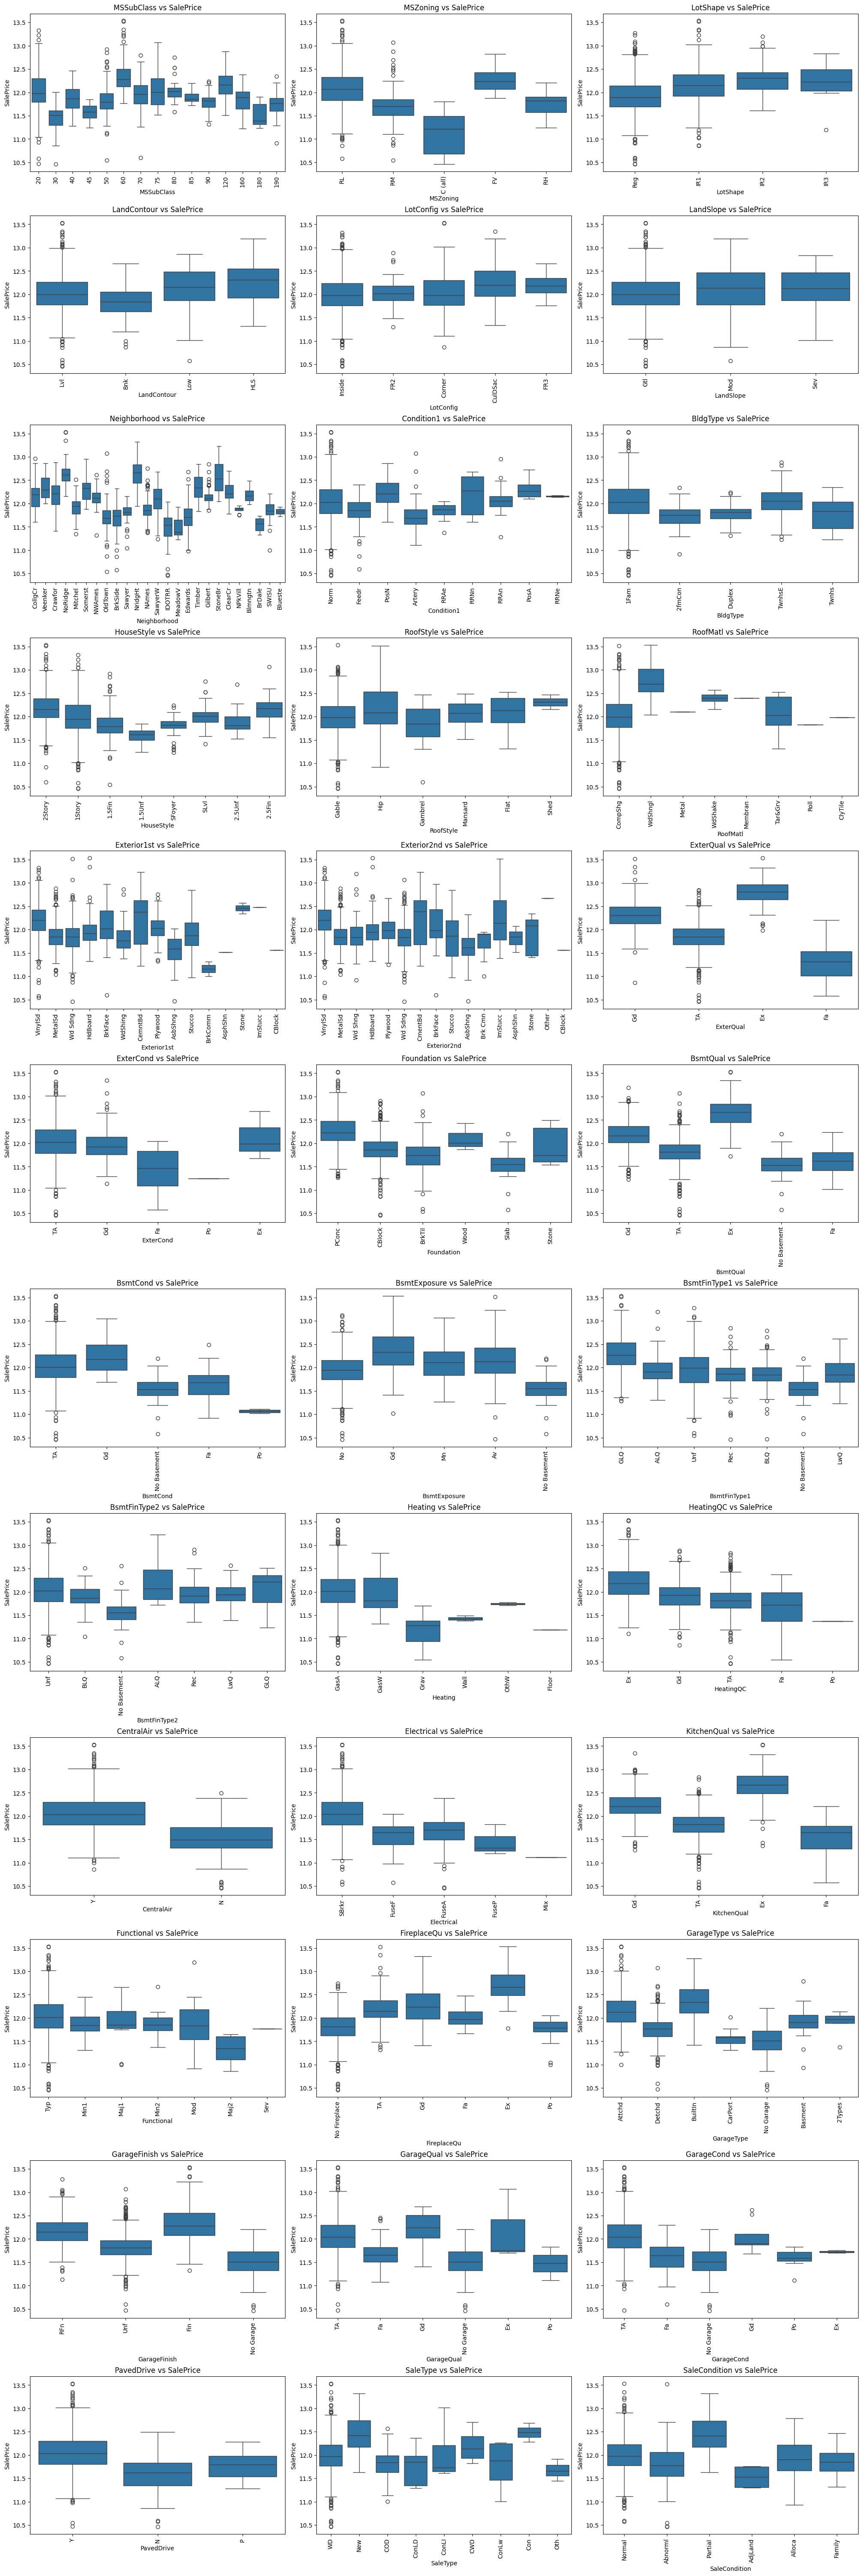

In [ ]:
# Categorical features to plot. Box plots are used to visualize how SalePrice varies with different categories of each feature.
categorical_features = ['MSSubClass','MSZoning','LotShape','LandContour',
                        'LotConfig','LandSlope','Neighborhood','Condition1',
                        'BldgType','HouseStyle',
                        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                        'ExterQual','ExterCond','Foundation','BsmtQual',
                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'Heating','HeatingQC','CentralAir','Electrical',
                        'KitchenQual','Functional','FireplaceQu','GarageType',
                        'GarageFinish','GarageQual','GarageCond','PavedDrive',
                        'SaleType', 'SaleCondition']


# Layout for box plots
num_plots = len(categorical_features)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, feature in zip(axes, categorical_features):
    sns.boxplot(x=train_df[feature], y=train_df['SalePrice'], ax=ax)
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.show()


Task 2.3: Identified and handled outliers in the data. I have decide to use the z score method because it is less aggressive than the IQR method which drastically reduced my training data.

In [ ]:
# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(train_df[numerical_features]))

# Identify outliers with threshold (Z-score > 3)
outliers = np.where(z_scores > 3)

# Count the number of outliers
num_outliers = len(np.unique(outliers[0]))  # Unique rows with outliers
print(f"Number of outliers: {num_outliers}")

# Remove outliers from the training data
train_df_cleaned = train_df[(z_scores < 3).all(axis=1)]

# Difference in data size before and after removing outliers
print(f"Original data size: {train_df.shape[0]}")
print(f"Data size after removing outliers: {train_df_cleaned.shape[0]}")


Number of outliers: 430
Original data size: 1460
Data size after removing outliers: 1030


In [ ]:
train_df_cleaned = train_df #cleaned data

# **Phase 3: Feature Engineering**

Task 3.1: Created new features to improve the model's performance based on industry intuition/knowlege when looking to buy a house.

In [ ]:
# Total Square Feet
train_df.loc[:,'TotalSF'] = train_df['BsmtFinSF2'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1']
test_df.loc[:,'TotalSF'] = test_df['BsmtFinSF2'] + test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1']


In [ ]:
# Age of the house
train_df.loc[:,'HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df.loc[:,'HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [ ]:
# How long ago was the house remodelled?
train_df.loc[:,'HouseRemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df.loc[:,'HouseRemodelAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [ ]:
# Total Living Area
train_df.loc[:,'TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df.loc[:,'TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [ ]:
# Total Bathrooms
train_df.loc[:,'TotalBaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df.loc[:,'Totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [ ]:
# Total Porch Square Feet
train_df.loc[:,'TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df.loc[:,'TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [ ]:
#Simplifying/dropping columns since my engineered features already cover these
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd',
                                  '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                  'BsmtFullBath', 'FullBath', 'BsmtHalfBath',
                                  'HalfBath', 'OpenPorchSF', '3SsnPorch',
                                  'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

test_df = test_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd',
                                  '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                  'BsmtFullBath', 'FullBath', 'BsmtHalfBath',
                                  'HalfBath', 'OpenPorchSF', '3SsnPorch',
                                  'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

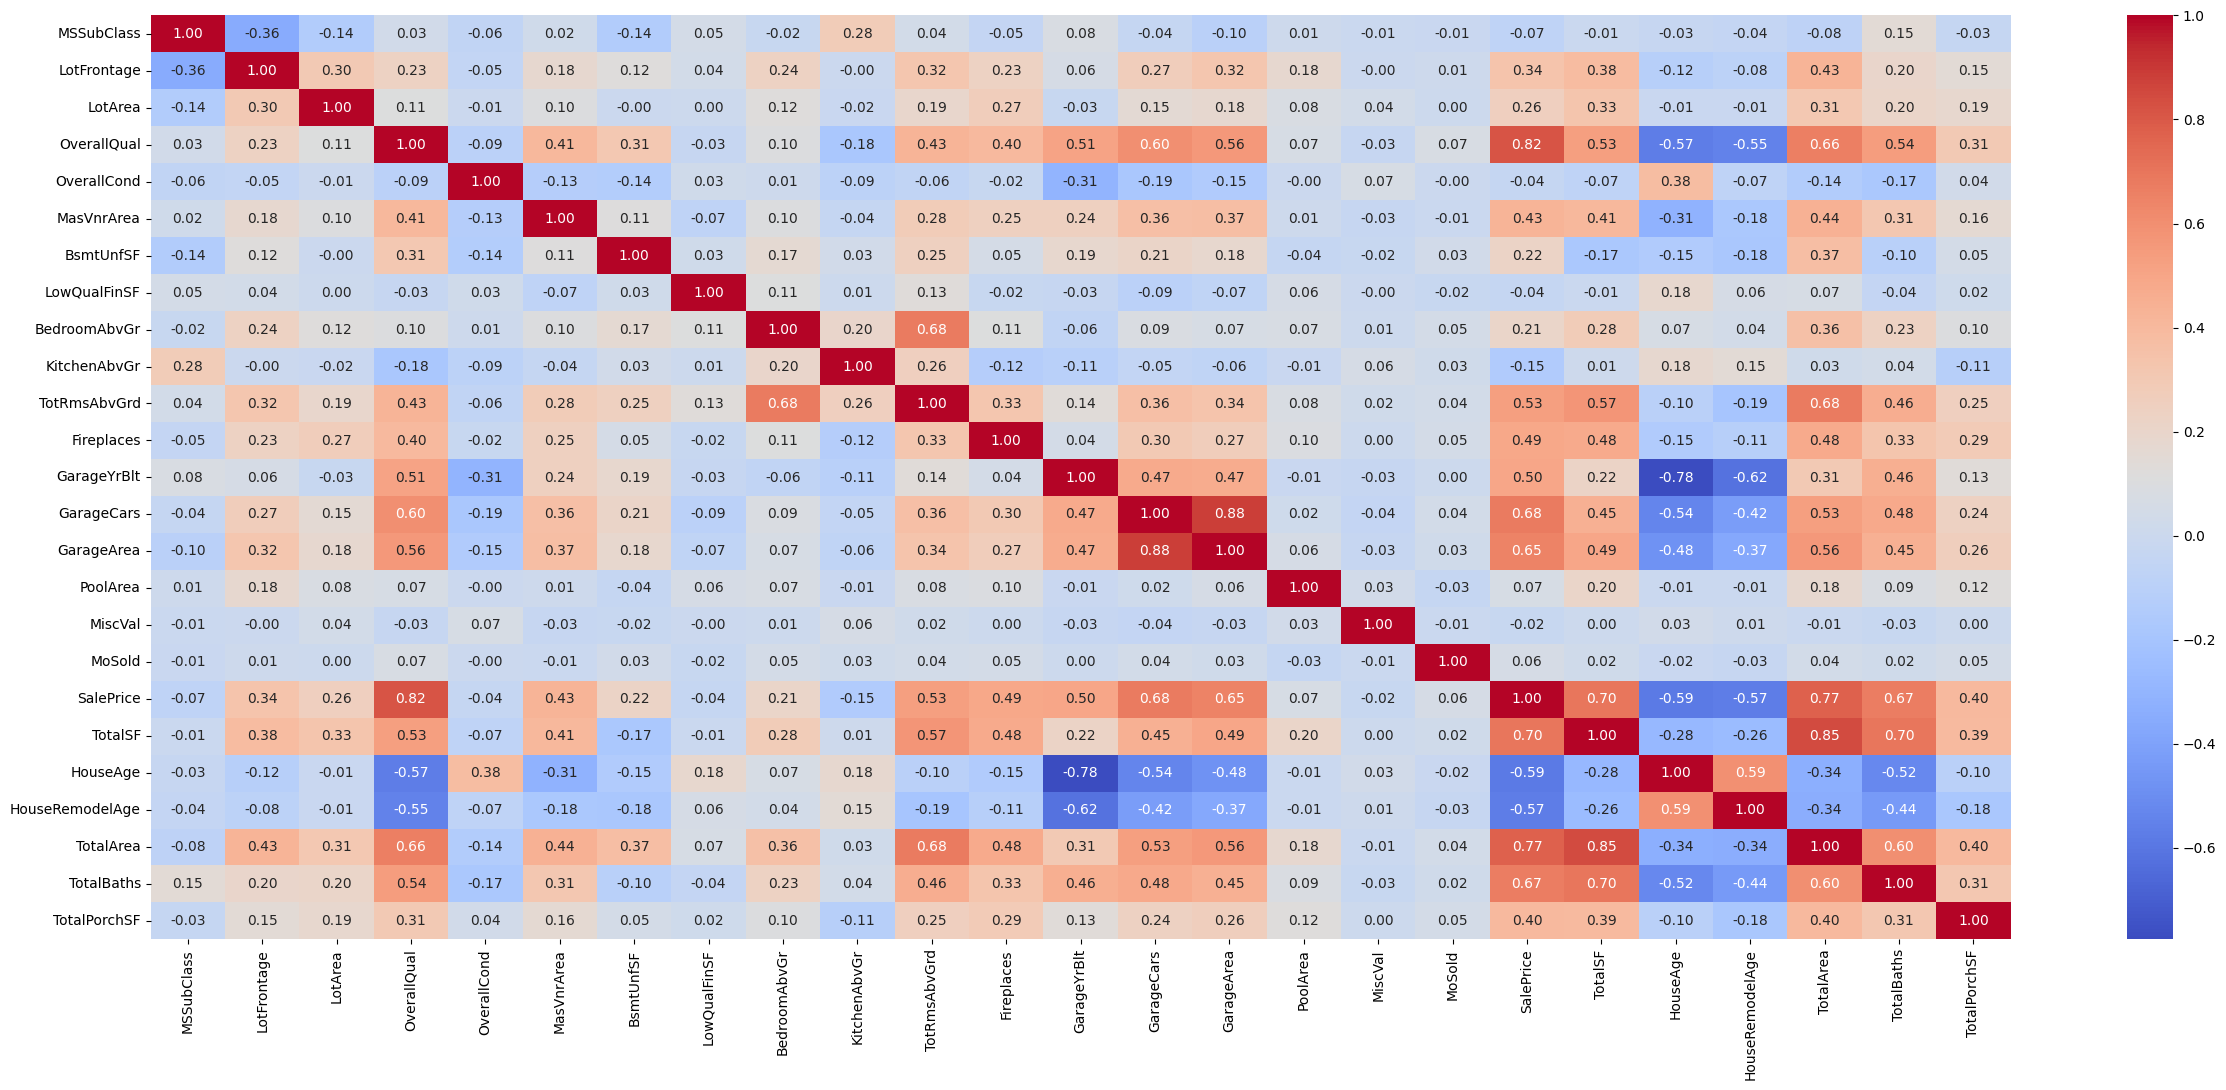

In [ ]:
# Confirming i dont have any redundant features
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(30,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
#Dropping a feature because of high collinearty between garage cars and garage area
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

Task 3.2: Encoded categorical variables using one-hot encoding techniques

In [ ]:
# I noticed in the data description these were actually categorical
# Transform numerical-looking features to categorical
train_df['MSSubClass'] = train_df['MSSubClass'].astype('category')
test_df['MSSubClass'] = test_df['MSSubClass'].astype('category')

train_df['OverallCond'] = train_df['OverallCond'].astype('category')
test_df['OverallCond'] = test_df['OverallCond'].astype('category')

train_df['OverallQual'] = train_df['OverallQual'].astype('category')
test_df['OverallQual'] = test_df['OverallQual'].astype('category')


In [ ]:
ordinal_encoding = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                    'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
                    'GarageQual', 'GarageCond']

one_hot_encoding = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                    'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
                    'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType',
                    'SaleCondition']


Task 3.3: Normalized numerical features using standardardization techniques

In [ ]:
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
# Separate target variable and features
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Define numerical and categorical Columns
num_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
num_columns = num_columns.drop('SalePrice') #Removing target variable
cat_columns = train_df.select_dtypes(include=['object']).columns

# Pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#Pipeline for categorical features
one_hot_encoding_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [ ]:
# Combine transformers with Column transformer
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_columns),
    ('ohe_p', one_hot_encoding_pipeline, cat_columns),
    ],
    remainder='passthrough',
    n_jobs=-1)

# Model pipeline with the column transformer
model_pipeline = Pipeline(steps=[
  ('preprocessor', col_trans),
  ('model', RandomForestRegressor(random_state=42))
])

# **Phase 4: Model Training and Evaluation**

Task 4.1: Split the dataset into training and testing sets

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape) #Inspect Data Splitting


(1168, 59) (292, 59)


Task 4.2: Choose and justify the selection of machine learning algorithms. I chose the following because:
1. **Linear Regression:** It is a straightforward model that helps understand the linear relationship between features and the target (SalePrice). Allows you to see how each feature individually impacts house prices.

2. **Decision Trees:** They capture complex, non-linear relationships and are easy to visualize.They help identify which features are most important in predicting house prices.

3. **Random Forest:** It is an ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting. Handles many features and complex relationships better, reducing the risk of overfitting.

4. **Gradient Boosting:** Builds trees sequentially with each one correcting the errors of the previous ones. Often leads to highly accurate models because it captures subtle patterns and interactions.

5. **XGBoost:** An optimized, efficient version of Gradient Boosting that includes regularization to prevent overfitting. Provides superior performance due to its ability to capture complex patterns and its scalability.

In [ ]:
# Defining and initializing my models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost' : XGBRegressor()
}

Task 4.3: Trained multiple models and evaluate their performance using RMSE, MAE and R2 metrics

In [ ]:
 # Function to create a pipeline for each model
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', col_trans),
                           ('model', model)])


def evaluate_model(model_pipeline, X_train, y_train, X_test, y_test): #Evaluation Function
    model_pipeline.fit(X_train, y_train) # Fit the model
    y_pred = model_pipeline.predict(X_test) # Predict and evaluate #_pipeline

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

results = {}
for name, model in models.items():
    model_pipeline = create_pipeline(model)  # Create a pipeline for each model
    mse, mae, r2 = evaluate_model(model_pipeline, X_train, y_train, X_test, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE            MAE            R2
Linear Regression  5.352748e+13  759463.105363 -2.868399e+14
Decision Tree      4.205813e-02       0.147766  7.746213e-01
Random Forest      2.093281e-02       0.098024  8.878265e-01
Gradient Boosting  1.667648e-02       0.089420  9.106351e-01
XGBoost            2.184428e-02       0.098321  8.829422e-01


When evaluating the models, *Gradient Boosting* stands out as the best performer, achieving the lowest MSE and MAE and the highest R², indicating it has the best predictive accuracy and least error among the models.

*Random Forest and XGBoost* also show strong performance, with relatively low MSE and MAE and high R² values. However, they fall slightly short of Gradient Boosting, likely due to their handling of the complex interactions between features.

The *Decision Tree* model, while still reasonably effective, does not perform as well as the ensemble methods, which benefit from aggregating multiple trees to reduce variance and improve robustness.

On the other hand, Linear Regression performs poorly with a significantly high MSE and a negative R², indicating that it fails to capture the relationship between features and the target variable. This poor performance is likely due to how the complex the features in this dataset are so I decided to disregard it in favor of more robust methods like ensemble learning.

Task 4.4: Performed hyperparameter tuning to optimize model performance.

In [ ]:
# Hyperparameter tuning for Random Forest, Gradient Boosting, Decision Tree, and XGBoost using GridSearchCV

param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7]
}

param_grid_dt = {
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(Pipeline(steps=[('preprocessor', col_trans),
                                              ('model', RandomForestRegressor(random_state=42))]),
                              param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(Pipeline(steps=[('preprocessor', col_trans),
                                              ('model', GradientBoostingRegressor(random_state=42))]),
                              param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1)

# GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(Pipeline(steps=[('preprocessor', col_trans),
                                              ('model', DecisionTreeRegressor(random_state=42))]),
                              param_grid=param_grid_dt, cv=5, scoring='r2', n_jobs=-1)

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(Pipeline(steps=[('preprocessor', col_trans),
                                               ('model', XGBRegressor(random_state=42))]),
                               param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV for Random Forest
print('\nTuning Random Forest...')
grid_search_rf.fit(X_train, y_train)
print('Best parameters for Random Forest:', grid_search_rf.best_params_)

mse_rf, mae_rf, r2_rf = evaluate_model(grid_search_rf.best_estimator_, X_train, y_train, X_test, y_test)
print('Random Forest - MSE:', mse_rf, 'MAE:', mae_rf, 'R2:', r2_rf)

# Fit GridSearchCV for Gradient Boosting
print('\nTuning Gradient Boosting...')
grid_search_gb.fit(X_train, y_train)
print('Best parameters for Gradient Boosting:', grid_search_gb.best_params_)

mse_gb, mae_gb, r2_gb = evaluate_model(grid_search_gb.best_estimator_, X_train, y_train, X_test, y_test)
print('Gradient Boosting - MSE:', mse_gb, 'MAE:', mae_gb, 'R2:', r2_gb)

# Fit GridSearchCV for Decision Tree
print('\nTuning Decision Tree...')
grid_search_dt.fit(X_train, y_train)
print('Best parameters for Decision Tree:', grid_search_dt.best_params_)

mse_dt, mae_dt, r2_dt = evaluate_model(grid_search_dt.best_estimator_, X_train, y_train, X_test, y_test)
print('Decision Tree - MSE:', mse_dt, 'MAE:', mae_dt, 'R2:', r2_dt)

# Fit GridSearchCV for XGBoost
print('\nTuning XGBoost...')
grid_search_xgb.fit(X_train, y_train)
print('Best parameters for XGBoost:', grid_search_xgb.best_params_)

mse_xgb, mae_xgb, r2_xgb = evaluate_model(grid_search_xgb.best_estimator_, X_train, y_train, X_test, y_test)
print('XGBoost - MSE:', mse_xgb, 'MAE:', mae_xgb, 'R2:', r2_xgb)



Tuning Random Forest...
Best parameters for Random Forest: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Random Forest - MSE: 0.020220634689964156 MAE: 0.09758910322896865 R2: 0.8916428510300882

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Gradient Boosting - MSE: 0.016141578458140408 MAE: 0.08661672332102918 R2: 0.9135014578713335

Tuning Decision Tree...
Best parameters for Decision Tree: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Decision Tree - MSE: 0.03305901556368629 MAE: 0.1268040866419473 R2: 0.822845290014023

Tuning XGBoost...
Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
XGBoost - MSE: 0.016571633931161685 MAE: 0.08754297210687861 R2: 0.9111969018734637


**Results:**
The best performing model was Gradient Boosting, with the lowest MSE (0.0161) and the highest R² score (0.9135). This indicates that Gradient Boosting not only captures the underlying patterns in the data with high accuracy but also generalizes well to unseen data. Its balance of flexibility and control over overfitting makes it an excellent choice for the final model.

The Random Forest model also performed well, with a relatively low MSE (0.0202) and a high R² (0.8916). While its performance is strong, it falls slightly short of Gradient Boosting in this scenario, likely due to its tendency to have higher variance, which can result in less precise predictions.

The Decision Tree model showed the highest MSE (0.0331) and the lowest R² (0.8228) among the tested models. These metrics suggest that the Decision Tree may be overfitting or failing to capture the complexity of the relationships in the data. This model is less effective, particularly when compared to the ensemble methods.

XGBoost also delivered strong performance, with MSE (0.0166) and R² (0.9112) values close to those of Gradient Boosting. However, it slightly underperforms in comparison, indicating that while it is a powerful model, Gradient Boosting edges it out for this dataset.

In [ ]:
# Gradient Boosting Regressor is my best performing model
# Using the best model parameters from GridSearchCV for cross validation
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    random_state=42
)

# Pipeline with the preprocessor and the best Gradient Boosting model
final_pipeline = create_pipeline(best_gb_model)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean R2:', cv_scores.mean())
print('Standard Deviation of R2:', cv_scores.std())

# Fit the final model on the entire training data
final_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
mse_final, mae_final, r2_final = evaluate_model(final_pipeline, X_train, y_train, X_test, y_test)
print('Final Model on Test Set - MSE:', mse_final, 'MAE:', mae_final, 'R2:', r2_final)


Cross-Validation R2 Scores: [0.88867651 0.86248666 0.8897972  0.90456526 0.90704708]
Mean R2: 0.8905145436485965
Standard Deviation of R2: 0.015875784078657293
Final Model on Test Set - MSE: 0.016141578458140408 MAE: 0.08661672332102918 R2: 0.9135014578713335


After identifying the **Gradient Boosting Regressor ** as the best-performing model through hyperparameter tuning, I conducted a 5-fold cross-validation to ensure its robustness and generalizability. The R² scores ranged from approximately 0.864 to 0.908, indicating consistent performance across different data splits. The narrow range and the low standard deviation of 0.0159 suggest that the model is stable and not overly sensitive to variations in the training data.

Subsequently, the final Gradient Boosting model was trained on the entire training dataset and evaluated on the unseen test data. The results show that the model effectively predicts house prices with minimal error (MSE: 0.0161, MAE: 0.0866) and explains a high proportion of the variance in the target variable (R²: 0.9135). These metrics affirm that the model generalizes well and is well-suited for this problem.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluating my model on the test set
# Since grid_search_gb was the best model after hyperparameter tuning

# Predicting on the test set
y_test_pred = final_pipeline.predict(X_test)

# Reverse  log transformation for both predictions and actual values
y_test_pred = np.exp(y_test_pred)  # Predicted values on original scale
y_test_original = np.exp(y_test)       # Actual values on original scale

# Calculate RMSE and MSE on the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred))
mse_original = mean_squared_error(y_test_original, y_test_pred)
mae_original = mean_absolute_error(y_test_original, y_test_pred)
r2_original = r2_score(y_test_original, y_test_pred)

# Print the results
print(f'Original Scale - RMSE: {rmse_original}')
print(f'Original Scale - MSE: {mse_original}')
print(f'Original Scale - MAE: {mae_original}')
print(f'Original Scale - R²: {r2_original}')

Original Scale - RMSE: 26507.846276877746
Original Scale - MSE: 702665914.2385814
Original Scale - MAE: 15462.894006226888
Original Scale - R²: 0.9083916517683198


After reversing the log transformation for both the predictions and actual values, the model's performance was evaluated on the original house price scale. The results are as follows:

RMSE: $26,507.85

MSE: $702,665,914.24

MAE: $15,462.89

R²: 0.9084

These metrics confirm that the model performs well even when evaluated on the original scale. The RMSE indicates that, on average, the predictions deviate from the actual prices by about $26,500, which is reasonable given the range of house prices in the dataset.

The MAE shows the average error is around $15,460, which is similarly low.

The MSE suggests that large errors are relatively rare, given its value, and the high R² (0.91) reaffirms that the model explains over 90% of the variance in house prices.



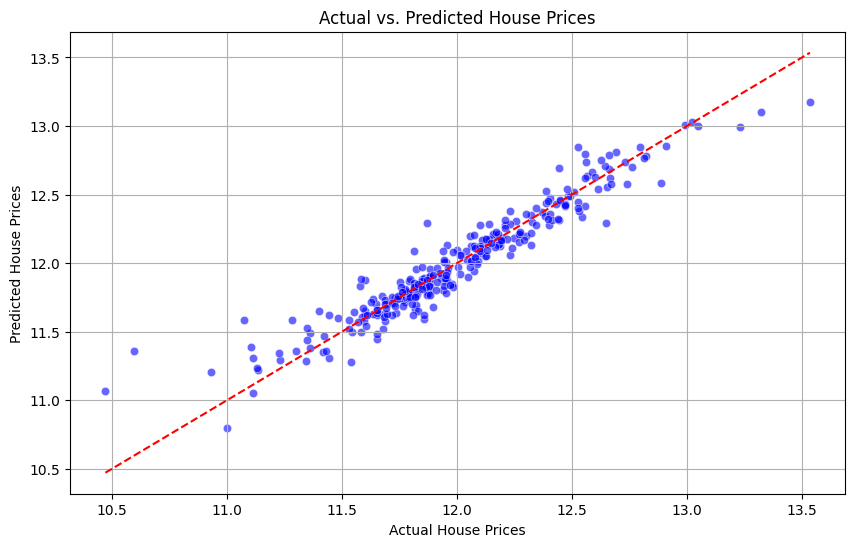

In [ ]:
# Predicting on the test set using the final pipeline
y_test_pred = final_pipeline.predict(X_test)

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6, color='blue')
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()


The upward trend in the scatter plot suggests a strong positive correlation between actual and predicted house prices, confirming that the model effectively captures the relationship between the input features and the target variable. The close alignment with the red line indicates accurate predictions, though the deviations seen in some points highlight the presence of outliers or areas where the model's predictions could be improved. To address these, future iterations of this project could explore more robust methods for handling outliers and consider fine-tuning the model further, possibly by implementing ensemble techniques like Voting or Stacking Regressors could be beneficial (e.g., combining multiple models to improve performance). These adjustments may enhance the model's performance, reflecting the project's inherent complexity and the need for continuous refinement.

In [ ]:
# Gradient Boosting Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Fit the pipeline with training data
model_pipeline.fit(X_train, y_train)

# Extract the trained Gradient Boosting model
model = model_pipeline.named_steps['model']

# Check if the model has 'feature_importances_' attribute
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_

    # Access feature names from the preprocessing step
    preprocessor = model_pipeline.named_steps['preprocessor']
    feature_names = preprocessor.get_feature_names_out()

    # Ensure that the lengths match
    if len(importances) != len(feature_names):
        raise ValueError("Length of importances does not match length of feature names")

    # DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Adjust the pandas display settings to show all rows
    pd.set_option('display.max_rows', None)  # Set to None to display all rows
    pd.set_option('display.max_colwidth', None)  # Set to None to display full column content


    # Display the DataFrame
    print("Feature Importance Analysis:")
    print(feature_importance_df)

else:
    print("The model does not have 'feature_importances_' attribute. Check the model type.")


Feature Importance Analysis:
                             Feature    Importance
256           remainder__OverallQual  3.564082e-01
17                  num_p__TotalArea  3.106752e-01
14                    num_p__TotalSF  8.001201e-02
18                 num_p__TotalBaths  4.831553e-02
10                 num_p__GarageCars  2.659237e-02
16            num_p__HouseRemodelAge  2.629483e-02
15                   num_p__HouseAge  2.299939e-02
1                     num_p__LotArea  1.705637e-02
257           remainder__OverallCond  1.315961e-02
211  ohe_p__FireplaceQu_No Fireplace  1.044466e-02
191              ohe_p__CentralAir_N  1.031355e-02
200            ohe_p__KitchenQual_TA  7.697506e-03
9                 num_p__GarageYrBlt  6.166363e-03
24                ohe_p__MSZoning_RM  5.119522e-03
192              ohe_p__CentralAir_Y  5.035451e-03
19               num_p__TotalPorchSF  4.867655e-03
8                  num_p__Fireplaces  3.377145e-03
151               ohe_p__BsmtQual_Ex  2.400065e-03
20

<ipython-input-43-ebe227ab429e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=important_features_df, palette='viridis')


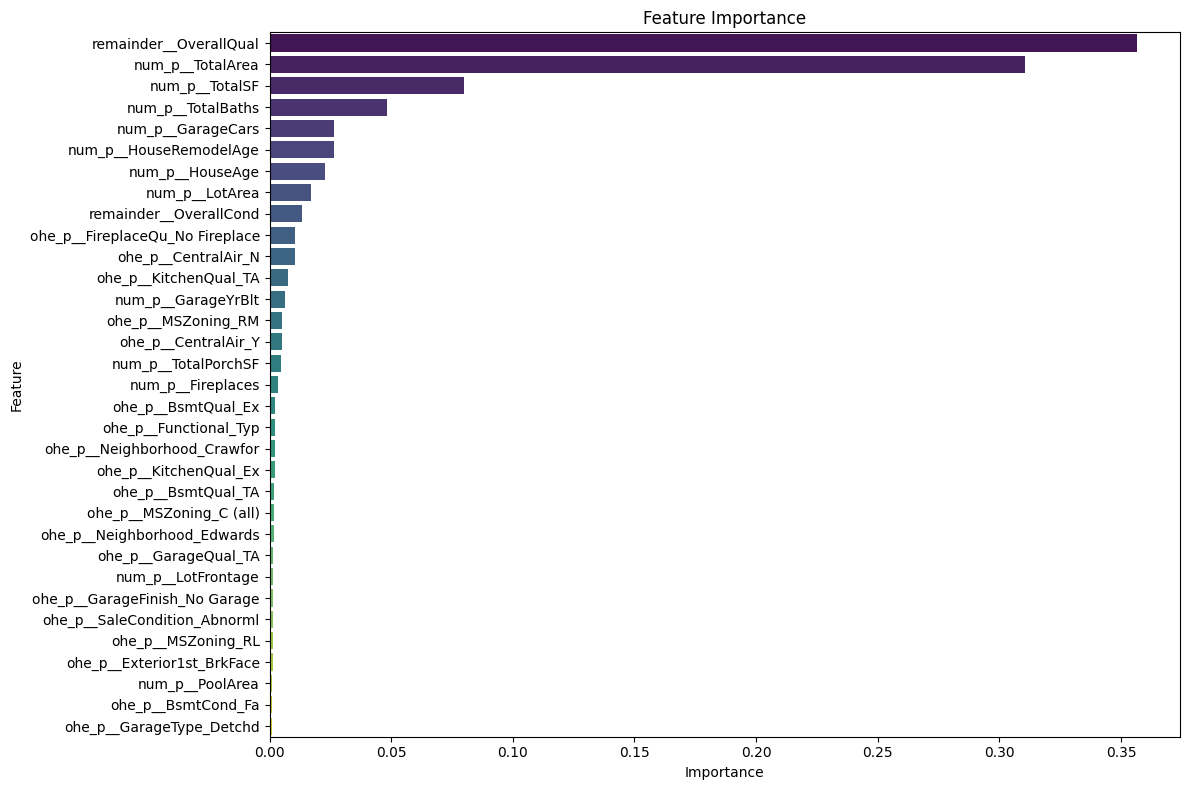

In [ ]:
# Graph to show feature importance
# Filtering out features with very low importance to focus on significant features
important_features_df = feature_importance_df[feature_importance_df['Importance'] > 1e-3] #Setting the threshold

# Sort the DataFrame by importance values first
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=important_features_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# **Conclusion**


Feature importance analysis revealed improving these factors can significantly influence house prices such as:

**OverallQual (0.3564):** The most significant feature influencing house prices. Higher quality ratings contribute strongly to higher prices.

**TotalArea (0.3107):** Total area of the house is the second most important feature. Larger houses generally have higher prices.

**TotalSF (0.0800):** Total square footage of the house. It has a moderate effect on price.

**TotalBaths (0.0486):** Number of bathrooms. More bathrooms slightly increase the house price.

**GarageCars (0.0266):** Number of cars that can be accommodated in the garage. It contributes to the price but less so compared to other features.

**HouseRemodelAge (0.0263):** Age of the house since last remodel. Renovated houses are valued higher.

**HouseAge (0.0229):** Age of the house itself. Older houses have lower values, assuming no modern improvements.

**LotArea (0.0170):** Size of the lot. Larger lots contribute positively to house prices.

The Gradient Boosting Regressor is recommended as the final model for predicting house prices due to its superior performance and stability. It effectively balances error minimization and variance explanation, making it a robust choice for this prediction task.This project demonstrates the application of data science and machine learning skills to predict house prices by understanding how these features contribute to pricing, it helps in making informed decisions about house improvements or investments by stakeholders in real world situations.